In [10]:
import pylab as pl
import numpy as np
import scipy as sp
import scipy.optimize as spo
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras

In [28]:
#filename = 'p_lin_100.csv'
#filename1 = 'p_circ_100.csv'

# train the LSTM

batch_x_train = []
batch_y_train = []

df_1 = pd.read_csv('p_lin_100_ex.csv')

for index, rows in df_1.iterrows():
    batch_y_train.append(0)
    list_1 = rows
    batch_x_train.append(list_1)
    
df_2 = pd.read_csv('p_circ_100_ex.csv')            

for index, rows in df_2.iterrows():
    batch_y_train.append(1)
    list_2 = rows
    batch_x_train.append(list_2)


#batch_x_train = tf.keras.utils.to_categorical(batch_x_train) #turn this into a tensor not categorical
batch_x_train = tf.convert_to_tensor(batch_x_train, dtype=tf.float32) 
#batch_x_train = np.asarray(batch_x_train, dtype=object)
batch_y_train = tf.keras.utils.to_categorical(batch_y_train)
batch_y_test = batch_y_train

batch_x_test = []

df_3 = pd.read_csv('p_v_lin_200_ex.csv')

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_test.append(list_3)
    
df_4 = pd.read_csv('p_v_circ_200_ex.csv')
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_test.append(list_4)
    
batch_x_test = tf.convert_to_tensor(batch_x_test, dtype=tf.float32)


lr = 1e-3
num_nodes = 6
num_classes = 2
num_epochs = 350
timesteps = 71
tf.keras.backend.clear_session()
X = tf.keras.Input(name='X', shape=[batch_x_train.shape[1],1], dtype=tf.dtypes.float32)
lstm_output = tf.keras.layers.LSTM(num_nodes)(X)
prediction = tf.keras.layers.Dense(num_classes)(lstm_output)
opt = tf.keras.optimizers.Adam(learning_rate=lr)
model = keras.Model(inputs=X, outputs=prediction)
model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x=batch_x_train, y=batch_y_train, epochs=num_epochs, validation_data=(batch_x_test,batch_y_test))

Epoch 1/350
10/10 [==============================] - 2s 64ms/step - loss: 0.7108 - accuracy: 0.4765 - val_loss: 0.6886 - val_accuracy: 0.5503
Epoch 2/350
10/10 [==============================] - 0s 28ms/step - loss: 0.7038 - accuracy: 0.4899 - val_loss: 0.6838 - val_accuracy: 0.5436
Epoch 3/350
10/10 [==============================] - 0s 29ms/step - loss: 0.6970 - accuracy: 0.4832 - val_loss: 0.6807 - val_accuracy: 0.5302
Epoch 4/350
10/10 [==============================] - 0s 30ms/step - loss: 0.6913 - accuracy: 0.4933 - val_loss: 0.6777 - val_accuracy: 0.5336
Epoch 5/350
10/10 [==============================] - 0s 26ms/step - loss: 0.6861 - accuracy: 0.5067 - val_loss: 0.6745 - val_accuracy: 0.5336
Epoch 6/350
10/10 [==============================] - 0s 26ms/step - loss: 0.6804 - accuracy: 0.5201 - val_loss: 0.6717 - val_accuracy: 0.5369
Epoch 7/350
10/10 [==============================] - 0s 26ms/step - loss: 0.6756 - accuracy: 0.5436 - val_loss: 0.6700 - val_accuracy: 0.5503
Epoch 

10/10 [==============================] - 0s 25ms/step - loss: 0.5632 - accuracy: 0.6980 - val_loss: 0.5326 - val_accuracy: 0.7550
Epoch 59/350
10/10 [==============================] - 0s 25ms/step - loss: 0.5639 - accuracy: 0.7148 - val_loss: 0.5275 - val_accuracy: 0.7785
Epoch 60/350
10/10 [==============================] - 0s 26ms/step - loss: 0.5481 - accuracy: 0.7383 - val_loss: 0.5107 - val_accuracy: 0.8020
Epoch 61/350
10/10 [==============================] - 0s 25ms/step - loss: 0.5433 - accuracy: 0.7383 - val_loss: 0.5040 - val_accuracy: 0.8020
Epoch 62/350
10/10 [==============================] - 0s 25ms/step - loss: 0.5443 - accuracy: 0.7315 - val_loss: 0.5018 - val_accuracy: 0.7987
Epoch 63/350
10/10 [==============================] - 0s 25ms/step - loss: 0.5449 - accuracy: 0.7349 - val_loss: 0.5039 - val_accuracy: 0.7987
Epoch 64/350
10/10 [==============================] - 0s 26ms/step - loss: 0.5372 - accuracy: 0.7383 - val_loss: 0.5227 - val_accuracy: 0.7919
Epoch 65/350

10/10 [==============================] - 0s 26ms/step - loss: 0.5052 - accuracy: 0.7584 - val_loss: 0.4230 - val_accuracy: 0.8389
Epoch 116/350
10/10 [==============================] - 0s 26ms/step - loss: 0.5039 - accuracy: 0.7617 - val_loss: 0.4223 - val_accuracy: 0.8456
Epoch 117/350
10/10 [==============================] - 0s 29ms/step - loss: 0.5025 - accuracy: 0.7617 - val_loss: 0.4214 - val_accuracy: 0.8423
Epoch 118/350
10/10 [==============================] - 0s 26ms/step - loss: 0.5015 - accuracy: 0.7584 - val_loss: 0.4247 - val_accuracy: 0.8356
Epoch 119/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4999 - accuracy: 0.7685 - val_loss: 0.4202 - val_accuracy: 0.8557
Epoch 120/350
10/10 [==============================] - 0s 26ms/step - loss: 0.5192 - accuracy: 0.7450 - val_loss: 0.4354 - val_accuracy: 0.8289
Epoch 121/350
10/10 [==============================] - 0s 26ms/step - loss: 0.5264 - accuracy: 0.7383 - val_loss: 0.4245 - val_accuracy: 0.8389
Epoch 

Epoch 172/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4660 - accuracy: 0.8020 - val_loss: 0.4216 - val_accuracy: 0.8255
Epoch 173/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4650 - accuracy: 0.7953 - val_loss: 0.4264 - val_accuracy: 0.8289
Epoch 174/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4589 - accuracy: 0.8020 - val_loss: 0.4308 - val_accuracy: 0.8154
Epoch 175/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4565 - accuracy: 0.8054 - val_loss: 0.4367 - val_accuracy: 0.8188
Epoch 176/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4559 - accuracy: 0.8121 - val_loss: 0.4326 - val_accuracy: 0.8188
Epoch 177/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4563 - accuracy: 0.8054 - val_loss: 0.4304 - val_accuracy: 0.8154
Epoch 178/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4556 - accuracy: 0.8020 - val_loss: 0.4306 - val_accuracy:

Epoch 229/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4252 - accuracy: 0.8255 - val_loss: 0.4371 - val_accuracy: 0.8054
Epoch 230/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4248 - accuracy: 0.8255 - val_loss: 0.4397 - val_accuracy: 0.7987
Epoch 231/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4241 - accuracy: 0.8289 - val_loss: 0.4403 - val_accuracy: 0.7987
Epoch 232/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4252 - accuracy: 0.8255 - val_loss: 0.4414 - val_accuracy: 0.7987
Epoch 233/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4233 - accuracy: 0.8289 - val_loss: 0.4411 - val_accuracy: 0.7987
Epoch 234/350
10/10 [==============================] - 0s 27ms/step - loss: 0.4240 - accuracy: 0.8322 - val_loss: 0.4415 - val_accuracy: 0.8020
Epoch 235/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4217 - accuracy: 0.8289 - val_loss: 0.4404 - val_accuracy:

Epoch 286/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3973 - accuracy: 0.8389 - val_loss: 0.4592 - val_accuracy: 0.7987
Epoch 287/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3960 - accuracy: 0.8490 - val_loss: 0.4598 - val_accuracy: 0.7987
Epoch 288/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3962 - accuracy: 0.8423 - val_loss: 0.4604 - val_accuracy: 0.8020
Epoch 289/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3951 - accuracy: 0.8356 - val_loss: 0.4544 - val_accuracy: 0.8054
Epoch 290/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3944 - accuracy: 0.8423 - val_loss: 0.4615 - val_accuracy: 0.7987
Epoch 291/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3938 - accuracy: 0.8456 - val_loss: 0.4569 - val_accuracy: 0.7953
Epoch 292/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3913 - accuracy: 0.8490 - val_loss: 0.4649 - val_accuracy:

Epoch 343/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3541 - accuracy: 0.8591 - val_loss: 0.5326 - val_accuracy: 0.7752
Epoch 344/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3526 - accuracy: 0.8658 - val_loss: 0.5086 - val_accuracy: 0.7819
Epoch 345/350
10/10 [==============================] - 0s 26ms/step - loss: 0.3726 - accuracy: 0.8557 - val_loss: 0.5291 - val_accuracy: 0.7752
Epoch 346/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4316 - accuracy: 0.8154 - val_loss: 0.6625 - val_accuracy: 0.7248
Epoch 347/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4698 - accuracy: 0.8020 - val_loss: 0.4812 - val_accuracy: 0.7886
Epoch 348/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4244 - accuracy: 0.8087 - val_loss: 0.5292 - val_accuracy: 0.7785
Epoch 349/350
10/10 [==============================] - 0s 26ms/step - loss: 0.4071 - accuracy: 0.8188 - val_loss: 0.5387 - val_accuracy:

In [29]:
batch_x_val = []

df_3 = pd.read_csv('p_v_lin_200_ex.csv')

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_val.append(list_3)
    
df_4 = pd.read_csv('p_v_circ_200_ex.csv')
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_val.append(list_4)
    
batch_x_val = tf.convert_to_tensor(batch_x_val, dtype=tf.float32)

In [49]:
batch_x_test = []

rows_to_keep = [150,299]
df_3 = pd.read_csv('p_lin_200.csv',skiprows= lambda x: x not in rows_to_keep, usecols=range(71))

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_test.append(list_3)
    
df_4 = pd.read_csv('p_circ_100.csv',nrows=[150:149], usecols=range(71))
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_test.append(list_4)
    
#batch_x_train = tf.keras.utils.to_categorical(batch_x_train) #turn this into a tensor not categorical
batch_x_test = tf.convert_to_tensor(batch_x_test, dtype=tf.float32)

In [30]:
y_prediction = model.predict(batch_x_val)
y_prediction = np.argmax(y_prediction, axis=1)
y_test = np.argmax(batch_y_train, axis=1)
result = tf.math.confusion_matrix(y_test, y_prediction, num_classes=2, weights=None)
print(result)

10/10 [==============================] - 0s 4ms/step
tf.Tensor(
[[116  33]
 [ 27 122]], shape=(2, 2), dtype=int32)


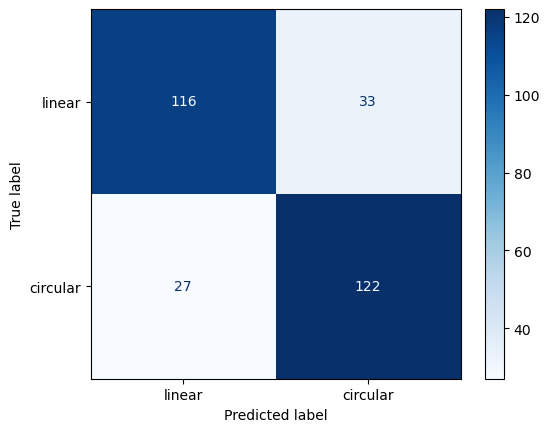

In [31]:
labels = ["linear", "circular"]
cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [51]:
df_3

,-25.08594,-21.91016,-6.261719,-42.9375,-92.32422,-88.90234,-79.36719,-107.4844,-102.5938,-93.30078,...,-57.36328,-23.375,-3.082031,-8.949219,14.27734,-4.792969,-7.484375,14.27734.1,-5.527344,7.1875


In [11]:
print(batch_x_train.shape[1])

71


In [16]:
batch_x_test = []
batch_y_test = []

df_1 = pd.read_csv('p_lin_100.csv')

for index, rows in df_1.iterrows():
    batch_y_train.append(0)
    list_1 = rows
    batch_x_train.append(list_1)
    
df_2 = pd.read_csv('p_circ_100.csv')            

for index, rows in df_2.iterrows():
    batch_y_train.append(1)
    list_2 = rows
    batch_x_train.append(list_2)

In [21]:
batch_y_train = tf.keras.utils.to_categorical(batch_y_train)

In [22]:
print(batch_y_train[0])

[1. 0.]


In [23]:
len(batch_y_train[0])

2

In [23]:
model.save('P_extended_TS_LSTM.keras')